# Playground

This is a safe space to conduct experiments and even fail. Success will eventually come!

In [5]:
# Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from utils import generate_random_floats

## Curve Fitting

In [6]:
def create_interpolation_function(x_points, y_points):
    ''' Function that creates a function that interpolates
        values between given x and y points. This new interpolation
        function is returned such that given any new x axis value,
        corresponding y axis value on the curve as per fitted data
        is returned.
    '''
    # Check if the number of x and y points match.
    if len(x_points) != len(y_points):
        raise ValueError("Number of x and y points must be the same.")
    
    # Create the interpolation function.
    interpolation_function = interp1d(
        x_points, y_points, 
        kind='linear', fill_value="extrapolate"
    )

    # Define a new function that takes an x value 
    # and returns the interpolated y value.
    def interpolated_function(x):
        return float(interpolation_function(x))

    return interpolated_function

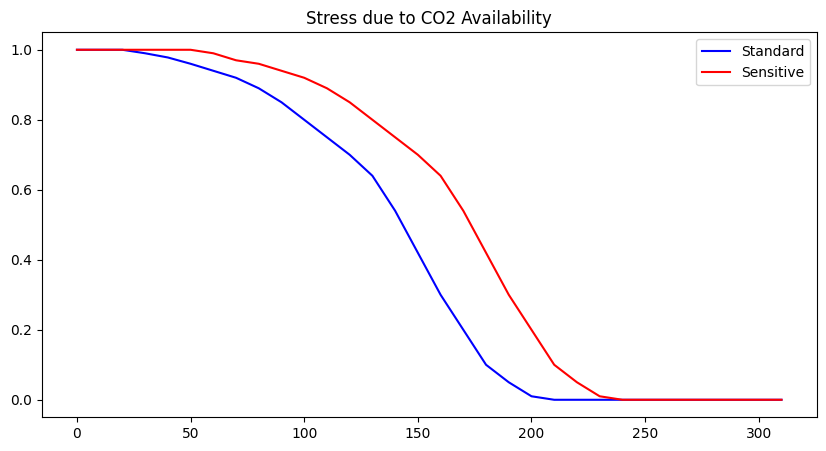

In [14]:
data_stress = {
    'co2': pd.read_csv('./data/co2_stress.csv').drop('stress_sensitive', axis=1),
    'co2_sensitive': pd.read_csv('./data/co2_stress.csv').drop('stress', axis=1)
}
data_stress['co2_sensitive'].columns = ['availability', 'stress']

curve_fn = {
    category: create_interpolation_function(df.availability, df.stress)
    for [category, df] in data_stress.items()
}

fig = plt.figure(figsize=(10,5))

plt.plot(
    data_stress['co2']['availability'], 
    [curve_fn['co2'](x) for x in data_stress['co2']['availability']], 
    color='blue', label='Standard'
)
plt.legend()

plt.plot(
    data_stress['co2_sensitive']['availability'], 
    [curve_fn['co2_sensitive'](x) for x in data_stress['co2_sensitive']['availability']], 
    color='red', label='Sensitive'
)
plt.legend()

plt.title('Stress due to CO2 Availability')
plt.savefig('./figures/co2_stress.png')
plt.show()

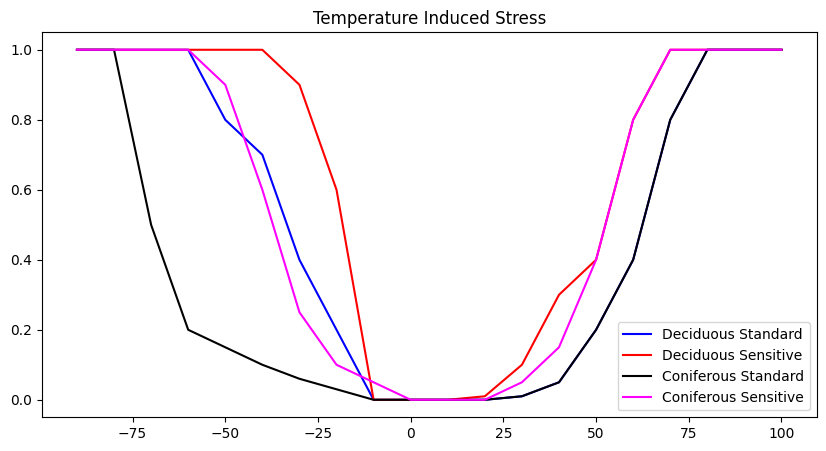

In [22]:
data_stress = {
    'temperature_deciduous': pd.read_csv('./data/temp_stress_deciduous.csv').drop('stress_sensitive', axis=1),
    'temperature_deciduous_sensitive': pd.read_csv('./data/temp_stress_deciduous.csv').drop('stress', axis=1),
    'temperature_coniferous': pd.read_csv('./data/temp_stress_coniferous.csv').drop('stress_sensitive', axis=1),
    'temperature_coniferous_sensitive': pd.read_csv('./data/temp_stress_coniferous.csv').drop('stress', axis=1)
}
data_stress['temperature_deciduous_sensitive'].columns = ['temperature', 'stress']
data_stress['temperature_coniferous_sensitive'].columns = ['temperature', 'stress']

curve_fn = {
    category: create_interpolation_function(df.temperature, df.stress)
    for [category, df] in data_stress.items()
}

fig = plt.figure(figsize=(10,5))

plt.plot(
    data_stress['temperature_deciduous']['temperature'], 
    [
        curve_fn['temperature_deciduous'](x) for x 
        in data_stress['temperature_deciduous']['temperature']
    ], 
    color='blue', label='Deciduous Standard'
)
plt.legend()

plt.plot(
    data_stress['temperature_deciduous_sensitive']['temperature'], 
    [
        curve_fn['temperature_deciduous_sensitive'](x) for x 
        in data_stress['temperature_deciduous_sensitive']['temperature']
    ], 
    color='red', label='Deciduous Sensitive'
)
plt.legend()

plt.plot(
    data_stress['temperature_coniferous']['temperature'], 
    [
        curve_fn['temperature_coniferous'](x) for x 
        in data_stress['temperature_coniferous']['temperature']
    ], 
    color='black', label='Coniferous Standard'
)
plt.legend()

plt.plot(
    data_stress['temperature_coniferous_sensitive']['temperature'], 
    [
        curve_fn['temperature_coniferous_sensitive'](x) for x 
        in data_stress['temperature_coniferous_sensitive']['temperature']
    ], 
    color='magenta', label='Coniferous Sensitive'
)
plt.legend()

plt.title('Temperature Induced Stress')
plt.savefig('./figures/temperature_stress.png')
plt.show()

In [30]:
# data_stress['temperature_deciduous_sensitive'].to_numpy().tolist()

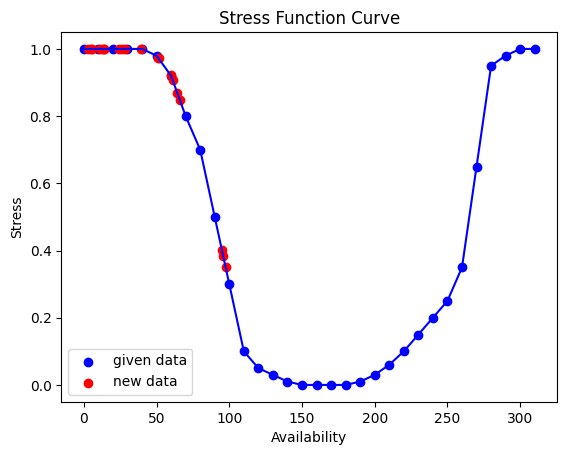

In [16]:
# Trial zone.
df = pd.read_csv('./data/water_stress_deciduous.csv')
curve_fn = create_interpolation_function(df.availability, df.stress)
plt.scatter(df['availability'], df['stress'], color='blue', label='given data')
plt.plot(df['availability'], df['stress'], color='blue')
new_points = sorted(generate_random_floats(20, 0, 100))
plt.scatter(new_points, [curve_fn(x) for x in new_points], color='red', label='new data')
plt.xlabel('Availability')
plt.ylabel('Stress')
plt.title('Stress Function Curve')
plt.legend()
plt.show()